### Implementing simple Chatbot Using LangGraph

In [12]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

from LCEL.serve import groq_api_key

In [13]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [32]:
import os
from dotenv import load_dotenv
load_dotenv()
# os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
groq_api_key = os.getenv("GROQ_API_KEY")
if groq_api_key:
    os.environ["GROQ_API_KEY"]=groq_api_key


In [19]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

In [33]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="llama-3.1-8b-instant")
llm_groq.invoke("Hey I am John and i like to play cricket")

AIMessage(content="Hello John, nice to meet you. It's great to hear that you like playing cricket. Which position do you prefer to play in? Are you a batsman, bowler, or all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 45, 'total_tokens': 89, 'completion_time': 0.067087209, 'completion_tokens_details': None, 'prompt_time': 0.002155406, 'prompt_tokens_details': None, 'queue_time': 0.050981674, 'total_time': 0.069242615}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b5fa0-bbec-71b0-9d70-b70406ec4b7f-0', usage_metadata={'input_tokens': 45, 'output_tokens': 44, 'total_tokens': 89})

### We Will start With Creating Nodes

In [18]:
from langchain_core.messages import HumanMessage

def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

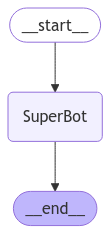

In [9]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [34]:
## Invocation
from langchain_core.messages import HumanMessage

graph_builder.invoke({'messages':[HumanMessage(content="Hi,My name is John And I like cricket")]})

{'messages': [HumanMessage(content='Hi,My name is John And I like cricket', additional_kwargs={}, response_metadata={}, id='d95d46da-eb7e-4754-88c0-7143dd926420'),
  AIMessage(content='Nice to meet you, John. Cricket is a fantastic sport. Are you an avid fan of the game, or do you play it yourself? Do you have a favorite team or player?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 45, 'total_tokens': 84, 'completion_time': 0.051804063, 'completion_tokens_details': None, 'prompt_time': 0.002967562, 'prompt_tokens_details': None, 'queue_time': 0.055498798, 'total_time': 0.054771625}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b5fa0-dd9b-7f93-9d36-4efd8bc03a84-0', usage_metadata={'input_tokens': 45, 'output_tokens': 39, 'total_tokens': 84})]}

#### Streaming The responses

In [35]:
for event in graph_builder.stream({"messages":[HumanMessage(content="Hello My name is Krish")]}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content="Hello Krish, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 40, 'total_tokens': 66, 'completion_time': 0.028710968, 'completion_tokens_details': None, 'prompt_time': 0.001878781, 'prompt_tokens_details': None, 'queue_time': 0.050419059, 'total_time': 0.030589749}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b5fa0-e747-73b3-b07f-24eb7a600cd7-0', usage_metadata={'input_tokens': 40, 'output_tokens': 26, 'total_tokens': 66})]}}
